In [1]:
import tweepy
import pandas as pd
from tweepy import OAuthHandler

In [2]:
token_key='738TFHPud0Pp3fC3OijnlKtkr'
token_pass='O3h7xPXsuvVV81MEwmmi6Y4m5Pto0R7rvgdoqQyQNGUkA2E74p'
access_key='1192043180469846016-wISQIfEz9a2xofjXcsfxZFkgNgGIYC'
access_pass='V85r9dkkRPuLFcCbWccx802uaS6FYUUPYSMMG8Dn0JrpC'

In [3]:
auth=OAuthHandler(token_key,token_pass)

In [4]:
auth.set_access_token(access_key,access_pass)

In [5]:
api=tweepy.API(auth)

In [6]:
tweet=api.search('modi',count=10000,lang='english')

In [8]:
len(tweet)

13

In [13]:
tweet[0].text

'Hard Times: Does the Modi government even understand what is going on with the Indian economy? https://t.co/RMHDCMaLb5'

In [16]:
t=[i.text for i in tweet]

In [17]:
t

['Hard Times: Does the Modi government even understand what is going on with the Indian economy? https://t.co/RMHDCMaLb5',
 'RT @AbdulMannanaik: How can India be called developed when its capital city has been reduced to gas chamber? Punjab CM to Modi https://t.co…',
 'How can India be called developed when its capital city has been reduced to gas chamber? Punjab CM to Modi https://t.co/s1W1f9yRev',
 'RCEP: Amul warns Modi govt, letter to Piyush Goyal likely to fall on deaf ears https://t.co/4lzlmp3hDS',
 'Worry for BJP: When PM Modi is not a factor and nationalism does not work https://t.co/2BGVilJ9Nc',
 'Leaked letter shows ‘International Broker’ Madi Sharma pulled off ‘PR stunt’ for Modi by facilitating Kashmir trip… https://t.co/WbJKTMO73q',
 'Sonia Gandhi: Modi govt sees institution of RTI as an obstacle to enforcing their majoritarian agenda https://t.co/FZgieuoht5',
 '‘When PR stunt backfires’: Twitter trolls Modi after EU MP says Opp politicians should be used to visit J&amp;K 

In [18]:
import re

In [19]:
tweets=pd.DataFrame(t)
tweets.columns=['Tweets']
tweets.head()

,Tweets
0,Hard Times: Does the Modi government even unde...
1,RT @AbdulMannanaik: How can India be called de...
2,How can India be called developed when its cap...
3,"RCEP: Amul warns Modi govt, letter to Piyush G..."
4,Worry for BJP: When PM Modi is not a factor an...


In [31]:
tweets['cleaned']=[re.split('\W+',i) for i in t]

In [32]:
tweets

,Tweets,cleaned
0,Hard Times: Does the Modi government even unde...,"[Hard, Times, Does, the, Modi, government, eve..."
1,RT @AbdulMannanaik: How can India be called de...,"[RT, AbdulMannanaik, How, can, India, be, call..."
2,How can India be called developed when its cap...,"[How, can, India, be, called, developed, when,..."
3,"RCEP: Amul warns Modi govt, letter to Piyush G...","[RCEP, Amul, warns, Modi, govt, letter, to, Pi..."
4,Worry for BJP: When PM Modi is not a factor an...,"[Worry, for, BJP, When, PM, Modi, is, not, a, ..."
5,Leaked letter shows ‘International Broker’ Mad...,"[Leaked, letter, shows, International, Broker,..."
6,Sonia Gandhi: Modi govt sees institution of RT...,"[Sonia, Gandhi, Modi, govt, sees, institution,..."
7,‘When PR stunt backfires’: Twitter trolls Modi...,"[, When, PR, stunt, backfires, Twitter, trolls..."
8,Everything is on sale...???? \n\nAirports for ...,"[Everything, is, on, sale, Airports, for, sale..."
9,Allowing European MPs to visit Kashmir was ‘gr...,"[Allowing, European, MPs, to, visit, Kashmir, ..."


In [34]:
from nltk.corpus import stopwords

In [36]:
a=stopwords.words('english')

In [46]:
def stpwrds(text):
    tw=[i for i in text if i not in a]
    return tw
tweets['stpwrds']=tweets['cleaned'].apply(lambda x:stpwrds(x))

In [47]:
tweets.head()

,Tweets,cleaned,stpwrds
0,Hard Times: Does the Modi government even unde...,"[Hard, Times, Does, the, Modi, government, eve...","[Hard, Times, Does, Modi, government, even, un..."
1,RT @AbdulMannanaik: How can India be called de...,"[RT, AbdulMannanaik, How, can, India, be, call...","[RT, AbdulMannanaik, How, India, called, devel..."
2,How can India be called developed when its cap...,"[How, can, India, be, called, developed, when,...","[How, India, called, developed, capital, city,..."
3,"RCEP: Amul warns Modi govt, letter to Piyush G...","[RCEP, Amul, warns, Modi, govt, letter, to, Pi...","[RCEP, Amul, warns, Modi, govt, letter, Piyush..."
4,Worry for BJP: When PM Modi is not a factor an...,"[Worry, for, BJP, When, PM, Modi, is, not, a, ...","[Worry, BJP, When, PM, Modi, factor, nationali..."


In [48]:
tweets.stpwrds[1]

['RT',
 'AbdulMannanaik',
 'How',
 'India',
 'called',
 'developed',
 'capital',
 'city',
 'reduced',
 'gas',
 'chamber',
 'Punjab',
 'CM',
 'Modi',
 'https',
 'co',
 '']

In [50]:
from nltk import PorterStemmer

In [51]:
ps=PorterStemmer()

In [52]:
ps

<PorterStemmer>

In [58]:
def stem(text):
    st=[ps.stem(i.lower()) for i in text]
    return(st)

In [59]:
tweets['stemed']=[i for i in tweets.stpwrds.apply(lambda x:stem(x))]

In [60]:
tweets

,Tweets,cleaned,stpwrds,stemed
0,Hard Times: Does the Modi government even unde...,"[Hard, Times, Does, the, Modi, government, eve...","[Hard, Times, Does, Modi, government, even, un...","[hard, time, doe, modi, govern, even, understa..."
1,RT @AbdulMannanaik: How can India be called de...,"[RT, AbdulMannanaik, How, can, India, be, call...","[RT, AbdulMannanaik, How, India, called, devel...","[rt, abdulmannanaik, how, india, call, develop..."
2,How can India be called developed when its cap...,"[How, can, India, be, called, developed, when,...","[How, India, called, developed, capital, city,...","[how, india, call, develop, capit, citi, reduc..."
3,"RCEP: Amul warns Modi govt, letter to Piyush G...","[RCEP, Amul, warns, Modi, govt, letter, to, Pi...","[RCEP, Amul, warns, Modi, govt, letter, Piyush...","[rcep, amul, warn, modi, govt, letter, piyush,..."
4,Worry for BJP: When PM Modi is not a factor an...,"[Worry, for, BJP, When, PM, Modi, is, not, a, ...","[Worry, BJP, When, PM, Modi, factor, nationali...","[worri, bjp, when, pm, modi, factor, nation, w..."
5,Leaked letter shows ‘International Broker’ Mad...,"[Leaked, letter, shows, International, Broker,...","[Leaked, letter, shows, International, Broker,...","[leak, letter, show, intern, broker, madi, sha..."
6,Sonia Gandhi: Modi govt sees institution of RT...,"[Sonia, Gandhi, Modi, govt, sees, institution,...","[Sonia, Gandhi, Modi, govt, sees, institution,...","[sonia, gandhi, modi, govt, see, institut, rti..."
7,‘When PR stunt backfires’: Twitter trolls Modi...,"[, When, PR, stunt, backfires, Twitter, trolls...","[, When, PR, stunt, backfires, Twitter, trolls...","[, when, pr, stunt, backfir, twitter, troll, m..."
8,Everything is on sale...???? \n\nAirports for ...,"[Everything, is, on, sale, Airports, for, sale...","[Everything, sale, Airports, sale, Modi, gover...","[everyth, sale, airport, sale, modi, govern, p..."
9,Allowing European MPs to visit Kashmir was ‘gr...,"[Allowing, European, MPs, to, visit, Kashmir, ...","[Allowing, European, MPs, visit, Kashmir, grav...","[allow, european, mp, visit, kashmir, gravest,..."


In [61]:
tweets.stemed[1]

['rt',
 'abdulmannanaik',
 'how',
 'india',
 'call',
 'develop',
 'capit',
 'citi',
 'reduc',
 'ga',
 'chamber',
 'punjab',
 'cm',
 'modi',
 'http',
 'co',
 '']

In [62]:
#word cloud:
from wordcloud import WordCloud

In [63]:
import matplotlib.pyplot as plt

In [64]:
wrd=' '
for i in tweets.stemed:
    for words in i:
        wrd=wrd+words+' '
WordCloud=WordCloud(width=600,height=600,background_color='white').generate(wrd)

(-0.5, 599.5, 599.5, -0.5)

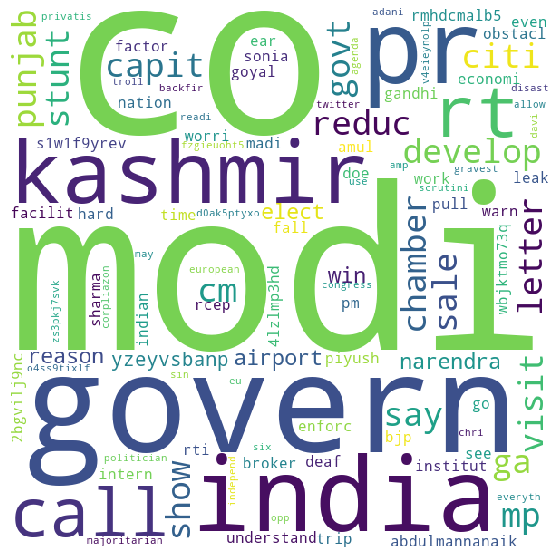

In [67]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud)
plt.axis('off')

In [68]:
tweets.head()

,Tweets,cleaned,stpwrds,stemed
0,Hard Times: Does the Modi government even unde...,"[Hard, Times, Does, the, Modi, government, eve...","[Hard, Times, Does, Modi, government, even, un...","[hard, time, doe, modi, govern, even, understa..."
1,RT @AbdulMannanaik: How can India be called de...,"[RT, AbdulMannanaik, How, can, India, be, call...","[RT, AbdulMannanaik, How, India, called, devel...","[rt, abdulmannanaik, how, india, call, develop..."
2,How can India be called developed when its cap...,"[How, can, India, be, called, developed, when,...","[How, India, called, developed, capital, city,...","[how, india, call, develop, capit, citi, reduc..."
3,"RCEP: Amul warns Modi govt, letter to Piyush G...","[RCEP, Amul, warns, Modi, govt, letter, to, Pi...","[RCEP, Amul, warns, Modi, govt, letter, Piyush...","[rcep, amul, warn, modi, govt, letter, piyush,..."
4,Worry for BJP: When PM Modi is not a factor an...,"[Worry, for, BJP, When, PM, Modi, is, not, a, ...","[Worry, BJP, When, PM, Modi, factor, nationali...","[worri, bjp, when, pm, modi, factor, nation, w..."


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
vect=TfidfVectorizer(analyzer=stpwrds)

In [85]:
vect

TfidfVectorizer(analyzer=<function stpwrds at 0x7fcef1f72170>, binary=False,
                decode_error='strict', dtype=<class 'numpy.float64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [102]:
xvect=vect.fit_transform(tweets.stemed)

In [103]:
import numpy as np

In [104]:
xvect=pd.DataFrame(xvect.toarray())

In [105]:
xvect

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.271204,0.000000,0.000000,0.000000,0.000000,0.31449,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.290705,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.290705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.368964,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368964,0.368964,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.280097,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.300294,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.217997,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.25279,0.000000,0.217997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.250545,0.000000,0.50109,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.320318,...,0.00000,0.320318,0.276230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [106]:
from textblob import TextBlob

In [111]:
tx=TextBlob(tweet[0].text)

In [112]:
tx.sentiment.polarity

-0.2916666666666667

In [113]:
tweets.columns

Index(['Tweets', 'cleaned', 'stpwrds', 'stemed'], dtype='object')

In [114]:
twe=tweets.columns.astype(str)